In [3]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
snails = pd.read_csv("data/abalone.csv")

<IPython.core.display.Javascript object>

In [7]:
snails.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<IPython.core.display.Javascript object>

### Is the weight of male snails higher on avergae than female snails?

In [10]:
mails = snails[(snails["Sex"] == "M")]
fails = snails[(snails["Sex"] == "F")]

<IPython.core.display.Javascript object>

In [13]:
mails.info()
fails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1528 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    1528 non-null   object 
 1   Length                 1528 non-null   float64
 2   Diameter               1528 non-null   float64
 3   Height                 1528 non-null   float64
 4   Whole_weight           1528 non-null   float64
 5   Shucked_weight         1528 non-null   float64
 6   Viscera_weight         1528 non-null   float64
 7   Shell_weight           1528 non-null   float64
 8   Class_number_of_rings  1528 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 119.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 2 to 4175
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    1307 non-null   obje

<IPython.core.display.Javascript object>

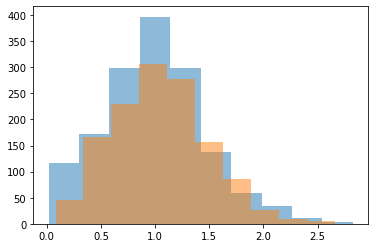

<IPython.core.display.Javascript object>

In [15]:
plt.hist(mails["Whole_weight"], alpha=0.5)
plt.hist(fails["Whole_weight"], alpha=0.5)
plt.show()

In [18]:
print(stats.describe(mails["Whole_weight"]))
print(stats.describe(fails["Whole_weight"]))

DescribeResult(nobs=1528, minmax=(0.0155, 2.8255), mean=0.9914594240837696, variance=0.22144682906633475, skewness=0.40560877693983, kurtosis=0.3522080855157492)
DescribeResult(nobs=1307, minmax=(0.08, 2.657), mean=1.0465321346595258, variance=0.18517212913502626, skewness=0.36807506367868875, kurtosis=0.059025885863292604)


<IPython.core.display.Javascript object>

Based on skewness and kurtosis, both distirbutions for whole weight of male and female snails is sufficiently normal for t-testing

In [25]:
stats.ttest_ind?

<IPython.core.display.Javascript object>

Ho = There is no difference in the mean whole weight between male and female snails

Ha = There is a difference in the mean whole weight between male and female snails.

Ho = x1 - x2 = 0

Ha = x1 - x2 != 0

In [19]:
stats.ttest_ind(mails["Whole_weight"], fails["Whole_weight"])

Ttest_indResult(statistic=-3.230536346547456, pvalue=0.0012497207919589404)

<IPython.core.display.Javascript object>

With a p-value < 0.01, there is less than 1% to find this difference in means in the population if the null hypothesis is true. 

In [20]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt(
        (sample_1_var / sample_1_n) + (sample_2_var / sample_2_n)
    )
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return (
        "The difference in means at the 95% confidence interval (two-tail) is between "
        + str(ci_lower)
        + " and "
        + str(ci_upper)
        + "."
    )

<IPython.core.display.Javascript object>

In [21]:
get_95_ci(mails["Whole_weight"], fails["Whole_weight"])

'The difference in means at the 95% confidence interval (two-tail) is between 0.02189116918831107 and 0.08825425196320119.'

<IPython.core.display.Javascript object>

[[Text(0, 0, 'male snails'), Text(0, 0, 'female snails')]]

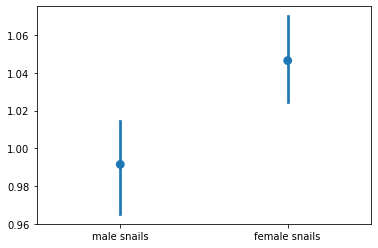

<IPython.core.display.Javascript object>

In [23]:
snails_weight = sns.pointplot(
    data=[mails["Whole_weight"], fails["Whole_weight"]], join=False
)
snails_weight.set(xticklabels=["male snails", "female snails"])